In [1]:
#la librería mnist este perminte identificar números escritos a manos y es de tensorflow 
#https://www.tensorflow.org/datasets/catalog/mnist?hl=es
#en la documentación aparece (28,28,1) esto representa a que es 28*28 en el tamaño del a imagen
# y el 1 significa los canales de corlor, por esto es que es en blanco y negro
#instalar pip install tensorflow-datasets
import tensorflow as tf
import tensorflow_datasets as tfds #sirve para descargar los sets de datos de tensorfow

In [2]:
datos, metadatos = tfds.load("mnist", as_supervised=True, with_info=True)# las dos propiedades lo que hace es que se descarguen con información y metadatos adicionales , esto regresa dos valores datos y metadatos por esto es que se asigna a la variable 

c:\Users\ManuelDev\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Dl Completed...: 0 url [00:00, ? url/s]
Dl Completed...: 100%|██████████| 4/4 [00:00<00:00, 23.43 url/s]
Extraction completed...: 0 file [00:00, ? file/s]
Dl Completed...: 100%|██████████| 4/4 [00:00<00:00, 20.86 url/s]


Dataset mnist downloaded and prepared to C:\Users\ManuelDev\tensorflow_datasets\mnist\3.0.1. Subsequent calls will reuse this data.


In [3]:
# se venb los metadatos del set
metadatos
"""en los datos parece Image que este hace referencia a la imagen en donde es de 28*28 y el 1 es el color es decir blanco y negro
en la parte del label (etiqueta) en el número de clases en donde número de clases es = a 10
esto es porque se esta clasificando las imagenes en una de 10 clases  es decir desde 0 hasta 9
"""

'en los datos parece Image que este hace referencia a la imagen en donde es de 28*28 y el 1 es el color es decir blanco y negro\nen la parte del label (etiqueta) en el número de clases en donde número de clases es = a 10\nesto es porque se esta clasificando las imagenes en una de 10 clases  es decir desde 0 hasta 9\n'

In [4]:
#ver los datos
datos

{Split('train'): <_PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 Split('test'): <_PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>}

In [5]:
datos["test"]

<_PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [6]:
#separación de los datos 
datos_entrenamiento = datos["train"]
datos_prueba = datos["test"]

In [7]:
#ver la etiqueta
metadatos.features["label"]

ClassLabel(shape=(), dtype=int64, num_classes=10)

In [8]:
#ver las etiquetas exactas
metadatos.features["label"].names

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [9]:
#guardado de las etiquetas
nombres_clases = metadatos.features["label"].names

In [10]:
#normalización
#0-255 donde 0 es totalmente negro y 255 es total mente blanco esto es porque cada pixel representa un bytte
#en la normalización lo que se hace es transformar para que ele lugar de que sea  de 0 a255 que sea de 0-1(donde 0=0 y 255=1)es decir que si se tiene un 127=0.5
#esto se hace porque los modelos trabajan mejor cuando los datos son escalados a número pequeños, ya que de lo contrario pueden batallar más durante el entrenamiento 

#normalización de datos de entrenamiento y pruebas con una función
def normalizar(imagenes, etiquetas):
    imagenes = tf.cast(imagenes, tf.float32)# esto se hace para que las imagenes originales son números enteros y van de 0 a 255 pero como se transforma de 0a1 necesitamos que sean decimales 
    imagenes= imagenes/255#esta es la normalización
    return imagenes, etiquetas

datos_entrenamiento = datos_entrenamiento.map(normalizar)
datos_prueba = datos_prueba.map(normalizar)
#con map se hace es que cada uno de los datos se separa y se envía ala función 

#agregar en cache esto para que cuando se estan procesando los datos en el entrenamiento sean guardados en memoria poara que sea más rápido la proxima vez
datos_entrenamiento = datos_entrenamiento.cache()
datos_prueba = datos_prueba.cache()

In [11]:
#ver como vienen ahora los datos 
datos_entrenamiento

<CacheDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [12]:
datos_entrenamiento.take(1)
#take es una función que toma de los datos de entrenamiente simplemente un registro 
#

<_TakeDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [15]:
#declaración de una imagen y una etiqueta
for imagen, etiqueta in datos_entrenamiento.take(1):
    break

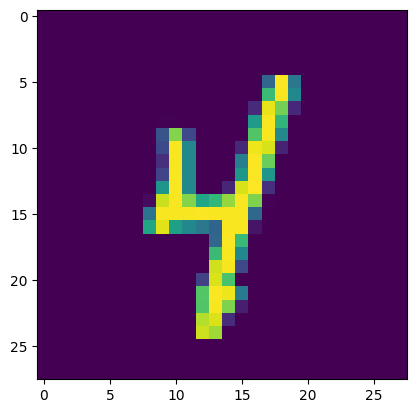

In [17]:
#mostrar en pantalla 
import matplotlib.pyplot as plt

#mostrar pantalla 
plt.figure()#aqui se muestra la imagen y recibe un tamaño 
plt.imshow(imagen)#este muestra la miagen tal cual
plt.show() 

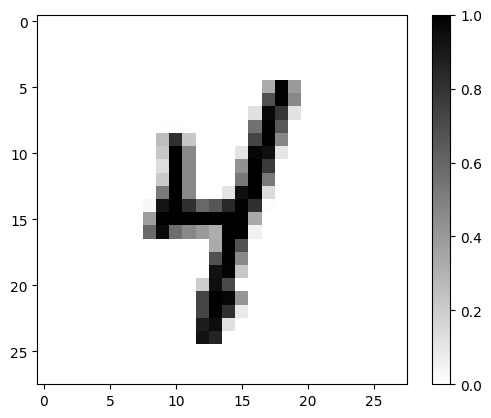

In [18]:
#para mostrar la imagen en blanco y negro se usa
plt.imshow(imagen,cmap=plt.cm.binary)
plt.colorbar()#me sirve para mostar una barra a la derecha  de color 

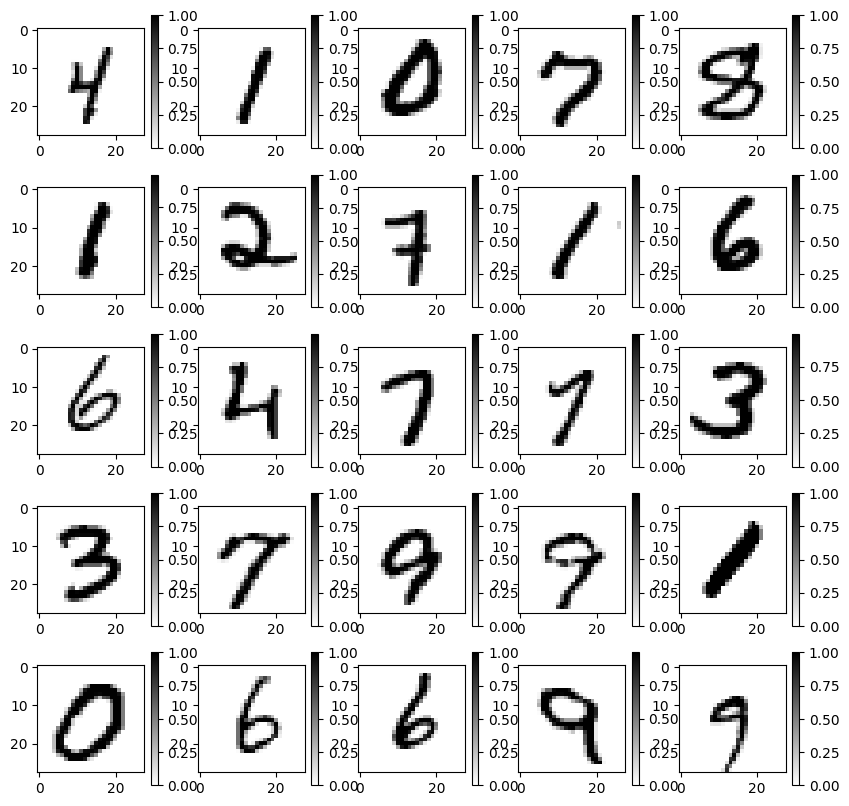

In [16]:
plt.figure(figsize=(10,10))#tamaño de la imagen
for i, (imagen, etiqueta) in enumerate( datos_entrenamiento.take(25)):#imagen y etiqueta sería una tupla y el enumerate sería para obtener el indice
    plt.subplot(5,5,i+1)#quiero 5 filas y 5 columnas y se debe especificar un indice erl i+1 es para que sepa como lo va a pintar en pantalla   
    plt.imshow(imagen,cmap=plt.cm.binary)
    plt.colorbar()
plt.show() 

In [21]:
# #entrenamiento 2
# modelo= tf.keras.Sequential([
#     #784 datos de entrada 
#    tf.keras.layers.Flatten(input_shape=(28,28,1)),
#    ###aqui se ponen las capas 
#    tf.keras.layers.Dense(50, activation = tf.nn.relu),#dos capas densas de 50 relu es para que en n´pumeros degativos da 0 y para positivos da ese mismo número 
#    tf.keras.layers.Dense(50, tf.nn.relu),#dos capas densas de 50
   
#    #capa de salida
#    tf.keras.layers.Dense(10, activation = tf.nn.softmax),
# ])

modelo = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation="relu"),  # Corregido aquí
    # capa de agrupación
    tf.keras.layers.MaxPooling2D(2, 2),  # pasa por toda la imagen y toma un cuadro de 2x2
    
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    # capa de agrupación
    tf.keras.layers.MaxPooling2D(2, 2),
    # capa de tipo flatten
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=100, activation="relu"),  # 100 neuronas
    # capa de clasificación
    tf.keras.layers.Dense(10, activation="softmax")  # 10 neuronas para las 10 clases
    ])

c:\Users\ManuelDev\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
modelo.compile(
    optimizer ="adam",#se pone adam si no se va a justar la tasa de aprendizaje 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),#esto permite al modelo ajustarse de manera adecuada cuando se hace una clasificación, en vez de una regresión
    metrics=["accuracy"]#exactitud del modelo
)

In [24]:
TAMANO_LOTE=32
datos_entrenamiento= datos_entrenamiento.repeat().shuffle(6000).batch(TAMANO_LOTE)
datos_prueba = datos_prueba.batch(TAMANO_LOTE)

In [25]:
#entrenamiento
import math

#entrenamiento 
entrenamiento = modelo.fit(
    datos_entrenamiento, epochs=10,   #las epocas es para ver cuanto va a aprender 
    steps_per_epoch=math.ceil(60000/TAMANO_LOTE)#cuando se trabaja por lotes se de debe dar un dato 
    #esto es para saber como se está optimizando cuando trabaja por lotes
    #ceil es para redondear números hacia arriba
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 19ms/step - accuracy: 0.9136 - loss: 0.2926
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.9843 - loss: 0.0512
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9889 - loss: 0.0350
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9927 - loss: 0.0232
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 24ms/step - accuracy: 0.9937 - loss: 0.0205
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9953 - loss: 0.0145
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9966 - loss: 0.0119
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9967 - loss: 0.0104
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9978 - loss: 0.0081
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9979 - loss: 0.0060


In [26]:
#entrenamiento 
entrenamiento = modelo.fit(
    datos_entrenamiento, epochs=10,   #las epocas es para ver cuanto va a aprender 
    steps_per_epoch=math.ceil(60000/TAMANO_LOTE)#cuando se trabaja por lotes se de debe dar un dato 
    #esto es para saber como se está optimizando cuando trabaja por lotes
    #ceil es para redondear números hacia arriba
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8461 - loss: 0.5333
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9569 - loss: 0.1499
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9672 - loss: 0.1048
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9755 - loss: 0.0812
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9780 - loss: 0.0693
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9822 - loss: 0.0557
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9848 - loss: 0.0480
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9864 - loss: 0.0434
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9872 - loss: 0.0394
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9888 - loss: 0.0340


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


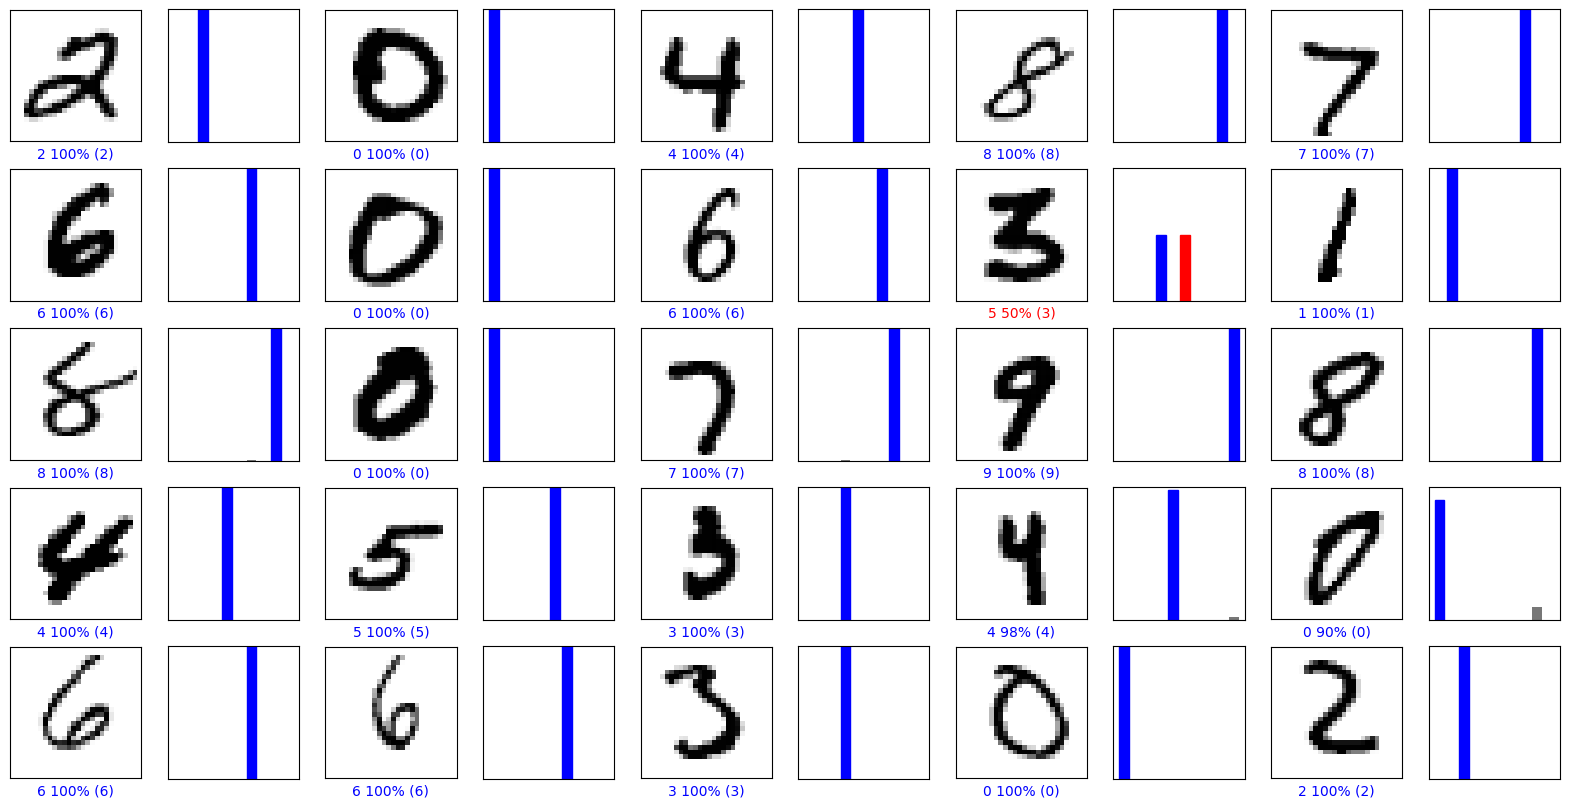

In [28]:
#Pintar una cuadricula con varias predicciones, y marcar si fue correcta (azul) o incorrecta (roja)
import numpy as np

for imagenes_prueba, etiquetas_prueba in datos_prueba.take(1):
  imagenes_prueba = imagenes_prueba.numpy()
  etiquetas_prueba = etiquetas_prueba.numpy()
  predicciones = modelo.predict(imagenes_prueba)
  
def graficar_imagen(i, arr_predicciones, etiquetas_reales, imagenes):
  arr_predicciones, etiqueta_real, img = arr_predicciones[i], etiquetas_reales[i], imagenes[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  etiqueta_prediccion = np.argmax(arr_predicciones)
  if etiqueta_prediccion == etiqueta_real:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(nombres_clases[etiqueta_prediccion],
                                100*np.max(arr_predicciones),
                                nombres_clases[etiqueta_real]),
                                color=color)
  
def graficar_valor_arreglo(i, arr_predicciones, etiqueta_real):
  arr_predicciones, etiqueta_real = arr_predicciones[i], etiqueta_real[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  grafica = plt.bar(range(10), arr_predicciones, color="#777777")
  plt.ylim([0, 1]) 
  etiqueta_prediccion = np.argmax(arr_predicciones)
  
  grafica[etiqueta_prediccion].set_color('red')
  grafica[etiqueta_real].set_color('blue')
  
filas = 5
columnas = 5
num_imagenes = filas*columnas
plt.figure(figsize=(2*2*columnas, 2*filas))
for i in range(num_imagenes):
  plt.subplot(filas, 2*columnas, 2*i+1)
  graficar_imagen(i, predicciones, etiquetas_prueba, imagenes_prueba)
  plt.subplot(filas, 2*columnas, 2*i+2)
  graficar_valor_arreglo(i, predicciones, etiquetas_prueba)

In [29]:
import shutil
import os

data_dir = os.path.expanduser("~\\tensorflow_datasets\\cats_vs_dogs")
shutil.rmtree(data_dir, ignore_errors=True)

In [30]:
# Paso 1: Crear el builder
builder = tfds.builder("cats_vs_dogs")

# Paso 2: Descargar y preparar con manejo de errores
try:
    builder.download_and_prepare()
except Exception as e:
    print("❌ Error durante la descarga/preparación:", e)

Dl Completed...: 100%|██████████| 1/1 [00:00<00:00, 47.62 url/s]
                                                                

❌ Error durante la descarga/preparación: "There is no item named 'PetImages\\\\Cat\\\\0.jpg' in the archive"
